In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape((28, 28))
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

In [5]:
y[36000]

5.0

In [6]:
def show_digit(digit_images, axes):
    for digit, ax in zip(digit_images, axes):
        ax.imshow(digit, cmap=mpl.cm.binary, interpolation='nearest')
        ax.axis('off')

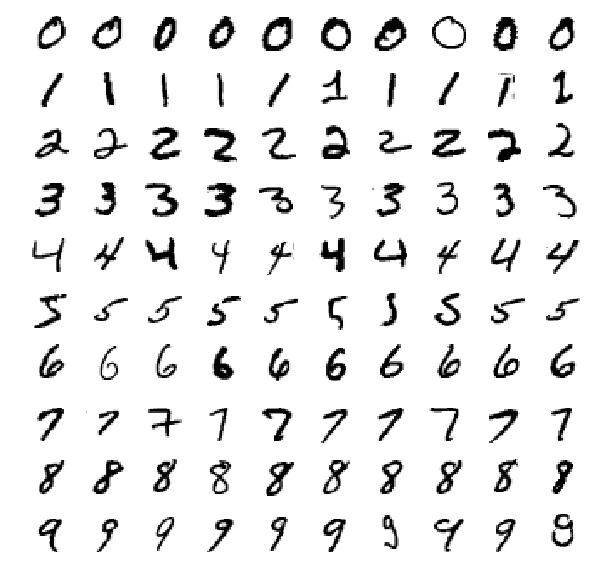

In [7]:
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
axes_all = axes.ravel()
for digit in range(10):
    digits = X[y == digit][:10].copy()
    digits_images = []
    axes, axes_all = axes_all[:10], axes_all[10:]
    for sample in digits:
        digits_images.append(sample.reshape((28, 28)))
    show_digit(digits_images, axes)

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [12]:
sgd_clf.predict([some_digit])

array([ True])

In [13]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred.shape

(60000,)

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[51810,  2769],
       [  779,  4642]])

Precision and Recall:

In [15]:
from sklearn.metrics import precision_score, recall_score
print("Precision: ", precision_score(y_train_5, y_train_pred))
print("Recall: ", recall_score(y_train_5, y_train_pred))

Precision:  0.6263662123869923
Recall:  0.8562995757240361


In [16]:
from sklearn.metrics import f1_score
print("F1 score: ", f1_score(y_train_5, y_train_pred))

F1 score:  0.7235037406483792


In [17]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
y_scores.shape

(60000,)

In [18]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [19]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label="Precision")
    plt.plot(thresholds, recalls[:-1], 'g-', label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc='center left')
    plt.ylim([0, 1])

(-700000, 700000)

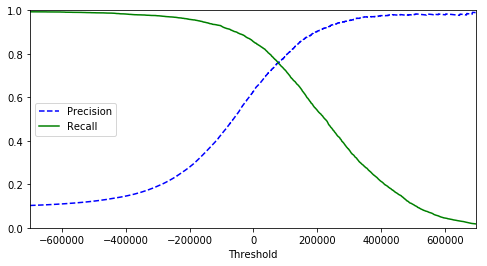

In [20]:
plt.figure(figsize=(8, 4));
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])

In [31]:
y_train_pred_90 = (y_scores > 120000) 

In [32]:
precision_score(y_train_5, y_train_pred_90)

0.8171265878230398

In [33]:
recall_score(y_train_5, y_train_pred_90)

0.6882494004796164

### ROC curve

In [34]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

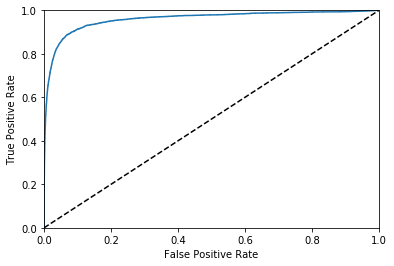

In [38]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
plot_roc_curve(fpr, tpr)

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9596140819439211

In [40]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [41]:
y_probas_forest.shape

(60000, 2)

In [48]:
y_probas_forest[:3]

array([[1., 0.],
       [1., 0.],
       [1., 0.]])

In [49]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

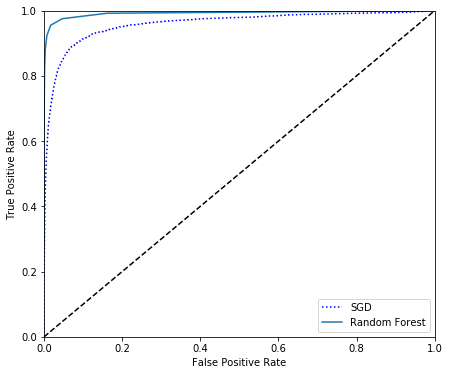

In [56]:
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, 'b:', label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right");

In [58]:
roc_auc_score(y_train_5, y_scores_forest)

0.9921425040687846

In [61]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
y_train_pred_forest.shape

(60000,)

In [83]:
y_train_pred_forest[0]

False

In [64]:
precision_score(y_train_5, y_train_pred_forest)

0.9839277851166887

In [65]:
recall_score(y_train_5, y_train_pred_forest)

0.8243866445305295

### Multiclass Classification

In [66]:
sgd_clf.fit(X_train, y_train)   # uses OvA (one-vs-all) by default

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [67]:
sgd_clf.predict([some_digit])

array([5.])

In [68]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-199048.46851478, -464095.05896615, -325721.36475184,
        -201801.01233521, -424621.33857234,   63777.27904873,
        -686512.6214828 , -453899.74472014, -633276.25698511,
        -687860.12524769]])

In [69]:
np.argmax(some_digit_scores)

5

In [70]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [71]:
sgd_clf.classes_[5]

5.0

In [73]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))  # OvO (one-vs-one)
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5.])

In [75]:
len(ovo_clf.estimators_)  # N*(N-1)/2 estimators (N - number of classes)

45

In [76]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [77]:
forest_clf.predict([some_digit])

array([5.])

In [78]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0.1, 0. , 0. , 0.8, 0. , 0. , 0. , 0.1]])

In [80]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")  # accuracy - by default

array([0.87942412, 0.87019351, 0.87543131])

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3)

array([0.90926815, 0.90769538, 0.91103666])

## Error Analisys

In [84]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5737,    3,   19,    9,   12,   50,   43,    8,   39,    3],
       [   2, 6494,   49,   21,    5,   42,    6,   10,  101,   12],
       [  60,   36, 5315,   96,   95,   25,   85,   59,  172,   15],
       [  50,   39,  139, 5363,    4,  216,   35,   57,  136,   92],
       [  21,   29,   27,    7, 5396,    9,   44,   24,   75,  210],
       [  73,   49,   36,  199,   76, 4576,  103,   24,  192,   93],
       [  33,   28,   42,    2,   49,   85, 5625,    8,   45,    1],
       [  19,   18,   69,   28,   66,    9,    6, 5798,   16,  236],
       [  52,  159,   75,  170,   15,  155,   51,   25, 5003,  146],
       [  45,   32,   25,   89,  178,   34,    1,  211,   81, 5253]])

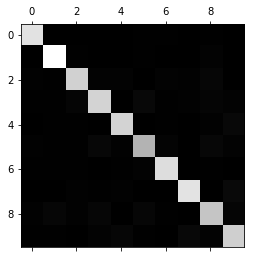

In [89]:
plt.matshow(conf_mx, cmap=plt.cm.gray);

In [90]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]])

In [92]:
norm_conf_mx = conf_mx / row_sums

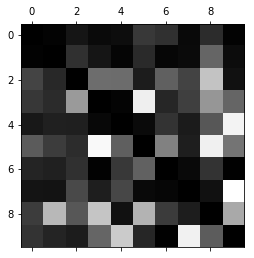

In [93]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray);